In [2]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


8


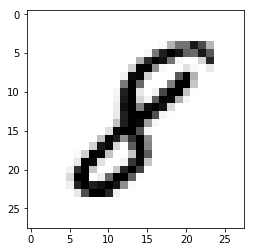

In [3]:
import matplotlib.pyplot as plt
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D , Dropout , Flatten , MaxPooling2D
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.6048 - accuracy: 0.8148
Epoch 2/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.2275 - accuracy: 0.9324
Epoch 3/10
60000/60000 [==============================] - 27s 452us/step - loss: 0.1666 - accuracy: 0.9505
Epoch 4/10
60000/60000 [==============================] - 27s 453us/step - loss: 0.1348 - accuracy: 0.9597
Epoch 5/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.1165 - accuracy: 0.9652
Epoch 6/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.1013 - accuracy: 0.9689
Epoch 7/10
60000/60000 [==============================] - 27s 454us/step - loss: 0.0928 - accuracy: 0.9718
Epoch 8/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.0850 - accuracy: 0.9742
Epoch 9/10
60000/60000 [==============================] - 27s 457us/step - loss: 0.0792 - accuracy: 0.9757
Epoch 10/10
60000/60000 [============

In [10]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 136us/step


[0.0670142863756977, 0.9797000288963318]

NameError: name 'img_rows' is not defined

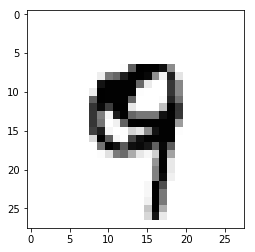

In [11]:
image_index=4444
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,img_rows,img_cols,1))
print(pred.argmax())